In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import axes3d

In [47]:
eps  = 0.01
t0, tmax = 0, 12
a0, amax = eps,3
b0, bmax = 0, 33
M, N = 200, 200
 
a_valores = np.linspace(a0, tmax, N)
b_valores = np.linspace(b0, bmax, N)
t_valores = np.linspace(0, tmax, N)

In [48]:
def f(t,a,b):
    return -a*np.log(1+b/a)+b + (a+b)*(1- np.exp(-t/a))

In [60]:
def ta(a,b):
    return a*np.log(1+b/a) 

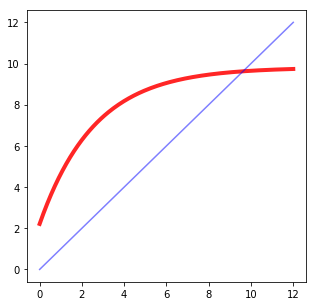

In [50]:
fig = plt.figure(figsize =(5,5))
ax = fig.subplots(1, 1)
ax.plot(t_valores,f_valores,  c='r',  linewidth=4, alpha=0.85)
ax.plot(t_valores,t_valores,  c='b', alpha=0.5)
plt.show()



In [51]:
def eqn(t,a,b):
    return t + a*np.log(1+b/a)-b - (a+b)*(1- np.exp(-t/a))


In [52]:
def t_desc(a,b):
    td =  fsolve(eqn, x0=b, args = (a,b))
    return td 

In [53]:
t_desc(2.6,5)

array([9.62349815])

In [54]:
desc = np.vectorize(t_desc)

In [55]:
aa, bb =  np.meshgrid(a_valores,b_valores)
td = desc(aa, bb)

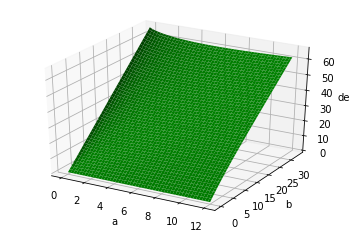

In [56]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(aa, bb, td, color='green')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('desc')

plt.show()

In [ ]:
f_valores = f(t_valores,2.6,5)
ta_valores = ta(2.6,b_valores)

In [57]:
td = desc(2.6, bb)

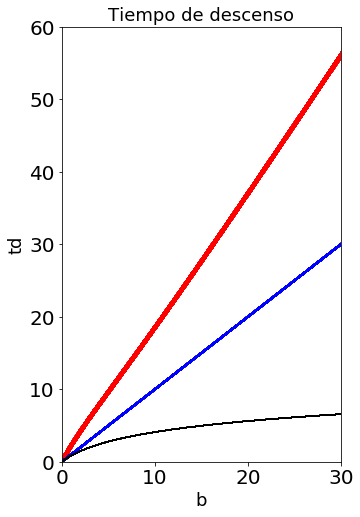

In [65]:
fig = plt.figure(figsize =(5,8))
ax = fig.subplots(1, 1)
ax.plot(bb,td,  c='r',  linewidth=4, alpha=0.85)
ax.plot(bb,bb,  c='b',  linewidth=2, alpha=0.85)
ax.plot(bb,ta_valores,  c='k',  linewidth=1, alpha=0.85)
#ax.plot(t_valores,t_valores,  c='b', alpha=0.5)
ax.set_xlim(0.0, 30)
ax.set_ylim(0.0, 60)
ax.set_xlabel('b', fontsize=18)
ax.set_ylabel('td', fontsize=18)
ax.set_title('Tiempo de descenso', fontsize=18)
plt.tick_params(labelsize=20)
 
plt.show()